# **Enzyme Kinetics** : 
#### An _accurate numerical solution_ of an enzymatic reaction `E + S <-> ES -> E + P` - compared to the **Michaelis-Menten** model approximation and to the alternative **Morrison** model, using real-life kinetic parameters. 

#### Scenario with _small amount of Enzyme_, relative to the initial Substrate concentration.

#### Unlike in experiment `enzyme_1_a`, we'll use data from a reaction that **VIOLATES the customary Michaelis-Menten assumption** that the rate constants satisfy `k1_reverse >> k2_forward`

### THE REACTION:  
the enzyme `Aminopeptidase` with the substrate `Leu-Ala-DED`,  
and the initial concentration values choosen below, all satisfy the customary Michaelis-Menten assumptions that  `[E] << [S]`    BUT the reaction rate constants DON'T satisfy `k1_reverse >> k2_forward`

For this reaction: k1_forward = 160 , k1_reverse = 0.089 , k2_forward = 0.58 

Source of kinetic parameters:  *page 16 of "Analysis of Enzyme Reaction Kinetics, Vol. 1", by F. Xavier Malcata, Wiley, 2023*

### TAGS :  "uniform compartment", "chemistry", "numerical", "enzymes"

In [1]:
LAST_REVISED = "Sep. 2, 2025"
LIFE123_VERSION = "1.0.0rc5"         # Library version this experiment is based on

In [2]:
#import set_path                    # Using MyBinder?  Uncomment this before running the next cell!

In [3]:
#import sys
#sys.path.append("C:/some_path/my_env_or_install")   # CHANGE to the folder containing your venv or libraries installation!
# NOTE: If any of the imports below can't find a module, uncomment the lines above, or try:  import set_path   

import pandas as pd

from life123 import check_version, ChemData, UniformCompartment, ReactionEnzyme, PlotlyHelper

In [4]:
check_version(LIFE123_VERSION)    # To check compatibility

OK


# PART 1. Accurate numerical solution

In [5]:
chem_data = ChemData(names=["P", "ES"], plot_colors=["green", "red"])

In [6]:
# Our Enzyme
chem_data.add_chemical(name="Aminopeptidase", label="E", plot_color="violet")

# Our Substrate
chem_data.add_chemical(name="Leu-Ala-DED", label="S", plot_color="darkturquoise")

chem_data.all_chemicals()

name label     plot_color
0               P     P          green
1              ES    ES            red
2  Aminopeptidase     E         violet
3     Leu-Ala-DED     S  darkturquoise

### Specify the Kinetic Parameters

Source: *page 16 of "Analysis of Enzyme Reaction Kinetics, Vol. 1", by F. Xavier Malcata, Wiley, 2023*

### Notice that the reaction rate constants below DON'T satisfy the customary `k1_reverse >> k2_forward`

In [7]:
# Here we use the "slow" preset for the variable steps, a conservative option prioritizing accuracy over speed
uc = UniformCompartment(chem_data=chem_data, preset="slow")

In [8]:
# Enzymatic reaction `E + S <-> ES -> E + P` 
uc.add_reaction(reactants="S", products="P", enzyme="E",
                k1_F=160., k1_R=0.089, k2_F=0.58)

uc.describe_reactions()

Number of reactions: 1
0: E + S <-> ES -> E + P  (Enzymatic reaction)  (k1_F = 160 / k1_R = 0.089 / k2_F = 0.58 / Temp = 25 C)
Chemicals involved in the above reactions: {"P" (green), "ES" (red), "E" (violet), "S" (darkturquoise)}


## Set the initial concentrations of all the chemicals
### in the scenario we're exploring, there's LITTLE ENZYME relative to initial substrate concentration,  
just like we did in experiment `enzyme_1_a`

In [9]:
S0 = 20.
E0 = 1.

In [10]:
uc.set_conc(conc={"S": S0, "E": E0})      # Small ampount of enzyme `E`, relative to substrate `S`
uc.describe_state()

SYSTEM STATE at Time t = 0:
4 species:
  Species 0 (P). Conc: 0.0
  Species 1 (ES). Conc: 0.0
  Species 2 (E). Conc: 1.0
  Species 3 (S). Conc: 20.0
Chemicals involved in reactions: ['S', 'E', 'ES', 'P']


#### Simulate the very early part of the reaction

In [11]:
# Perform the reactions  
# (Note: by default, concentration and rate history is kept for each step; we'll later reduce this frequency)
uc.single_compartment_react(duration=0.0015, initial_step=0.00001)

173 total variable step(s) taken in 0.352 sec
Norm usage: {'norm_A': 31, 'norm_B': 33, 'norm_C': 31, 'norm_D': 31}
System Time is now: 0.0015061


plot_pandas() NOTICE: Excessive number of vertical lines (174) - only showing 1 every 2 lines


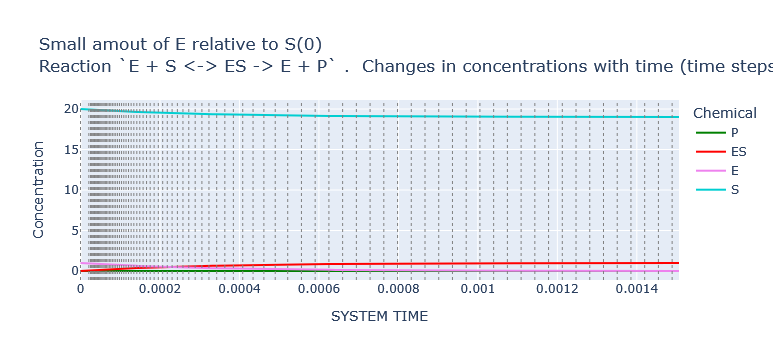

In [12]:
uc.plot_history(show_intervals=True, 
                title_prefix="Small amout of E relative to S(0)")

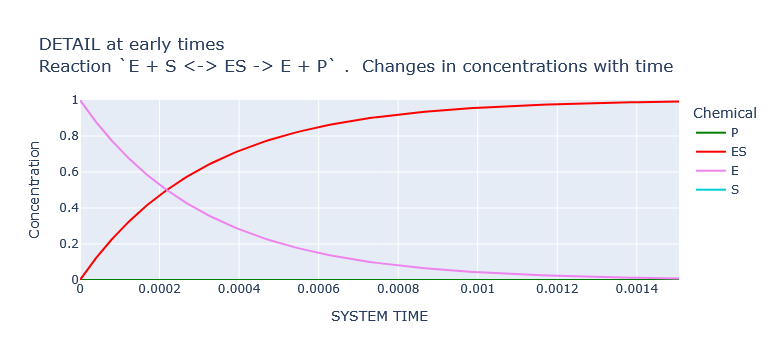

In [13]:
# Highlight a detail about the initial buildup of ES
uc.plot_history(title_prefix="DETAIL at early times",
                range_y=[0, 1])

### Notice the EXTREMELY fast kinetics involving the production of the intermediate `ES`

If one wishes to exam the history (of concentration or reaction-rate data) in tabular form, it can be done as follows:

In [14]:
uc.get_history()

SYSTEM TIME             P        ES         E          S step  \
0       0.000000  0.000000e+00  0.000000  1.000000  20.000000        
1       0.000010  0.000000e+00  0.032000  0.968000  19.968000    1   
2       0.000021  2.041600e-07  0.066019  0.933981  19.933981    2   
3       0.000024  3.305201e-07  0.075849  0.924151  19.924151    3   
4       0.000025  3.740726e-07  0.078766  0.921234  19.921234    4   
..           ...           ...       ...       ...        ...  ...   
169     0.001437  6.495498e-04  0.988861  0.011139  19.010489  169   
170     0.001454  6.594576e-04  0.989435  0.010565  19.009906  170   
171     0.001472  6.693712e-04  0.989979  0.010021  19.009352  171   
172     0.001489  6.792902e-04  0.990494  0.009506  19.008827  172   
173     0.001506  6.892144e-04  0.990982  0.009018  19.008329  173   

                caption  
0     Set concentration  
1     1st reaction step  
2                        
3                        
4                        
..                  ...  
169                      
170                      
171                      
172                      
173  last reaction step  

[174 rows x 7 columns]

In [15]:
uc.get_rate_history()

SYSTEM TIME  rxn0_rate_1  rxn0_rate_2 step
0       0.000000  3200.000000     0.000000    0
1       0.000010  3092.640992     0.018560    1
2       0.000021  2978.868127     0.038291    2
3       0.000024  2946.061101     0.043992    3
4       0.000025  2936.333355     0.045684    4
..           ...          ...          ...  ...
168     0.001420    35.636312     0.573188  168
169     0.001437    33.792720     0.573539  169
170     0.001454    32.046189     0.573872  170
171     0.001472    30.391600     0.574188  171
172     0.001489    28.824102     0.574486  172

[173 rows x 4 columns]

Note that rates are associated with the START times of the intervals.  So, at the end time of the simulation, there's no rate.

#### Advance the reactions to equilibrium

In [16]:
# From now on, the data from 1 of every 10 computation steps will be saved in the history (for later use in plots, etc). 
# Until this point, we've used the default of 1
uc.enable_history(frequency=10)

# Continue the reactions
uc.single_compartment_react(duration=40., initial_step=0.00001)

19936 total variable step(s) taken in 5.810 sec
Number of step re-do's because of negative concentrations: 116
Number of step re-do's because of elective soft aborts: 358
Norm usage: {'norm_A': 16558, 'norm_B': 17520, 'norm_C': 16558, 'norm_D': 16558}
System Time is now: 40.008


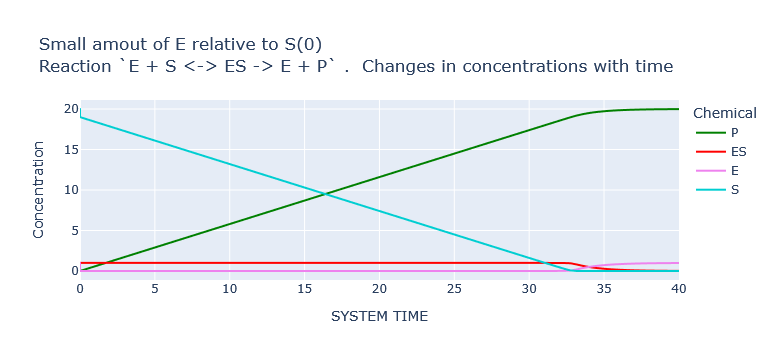

In [17]:
uc.plot_history(title_prefix="Small amout of E relative to S(0)")

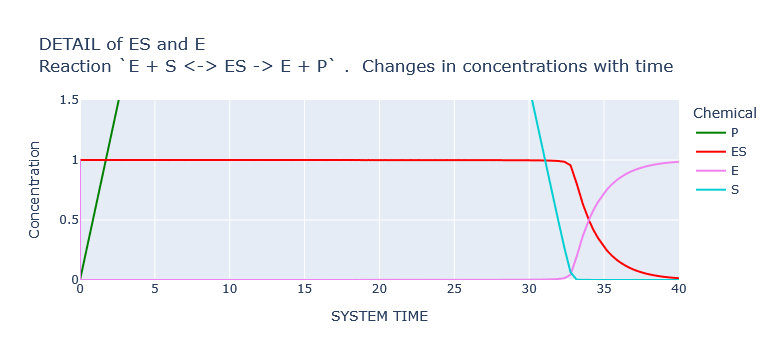

In [18]:
# Highlight a detail about the initial buildup of ES
uc.plot_history(title_prefix="DETAIL of ES and E",
                range_y=[0, 1.5])

#### Notice how the bound enzyme `ES` (red) quickly builds up at the very beginning, from time 0 to roughly 0.01 ... and that, in the longer term, the enzyme returns to its unbound state `E`

### What is the initial rate of production of the final reaction product `P`?   
One could take the numerical derivative (gradient) of the time values of [P] - but no need to!  **Reaction rates are computed in the course of the simulation, and stored in a rate-history dataframe** (as we also saw earlier)

In [19]:
rates = uc.get_rate_history()
rates

SYSTEM TIME  rxn0_rate_1  rxn0_rate_2   step
0        0.000000  3200.000000     0.000000      0
1        0.000010  3092.640992     0.018560      1
2        0.000021  2978.868127     0.038291      2
3        0.000024  2946.061101     0.043992      3
4        0.000025  2936.333355     0.045684      4
...           ...          ...          ...    ...
2162    39.081690     0.000009     0.014678  19889
2163    39.195774     0.000008     0.013736  19899
2164    39.491678     0.000007     0.011552  19909
2165    39.836446     0.000050     0.009430  19919
2166    39.903868     0.000005     0.009068  19929

[2167 rows x 4 columns]

Note that initially we were saving historical data at every simulation step, but later switched to every 10 steps

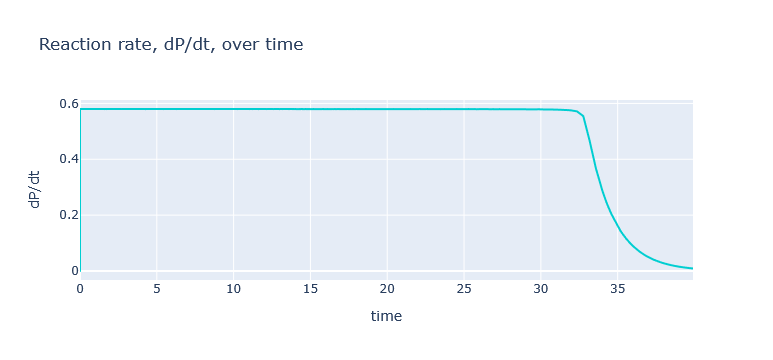

In [20]:
# Let's take a look at how the reaction rate varies with time
PlotlyHelper.plot_pandas(df=rates, 
                         title="Reaction rate, dP/dt, over time",
                         x_var="SYSTEM TIME", fields="rxn0_rate_2", 
                         x_label="time", y_label="dP/dt")

### Notice how very different is it from the Reaction rate over time seen in experiment `enzyme_1_a`

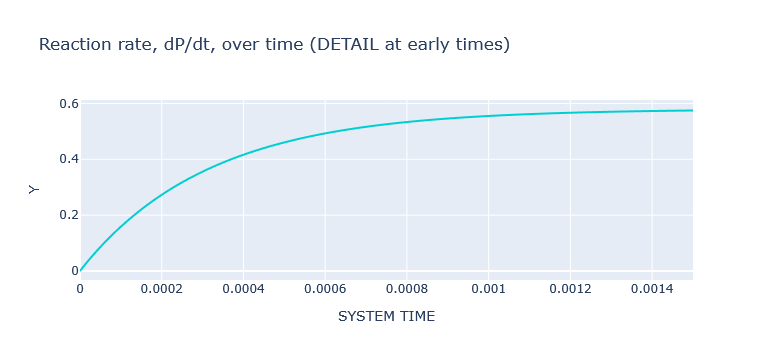

In [21]:
# A closer peek at its very quick buildup
PlotlyHelper.plot_pandas(df=rates, 
                         title="Reaction rate, dP/dt, over time (DETAIL at early times)",
                         x_var="SYSTEM TIME", fields="rxn0_rate_2", 
                         range_x=[0, 0.0015])

As we saw earlier, the time it took for `ES` to build up was about 0.001  
**Ignoring the very brief initial transient phase, the reaction rate starts at about 0.57, and stays at that value until the substrate gets depleted, arount t=33**

# PART 2. Comparing the results to the Michaelis-Menten model approximation

### Let's compute some parameters used by the Michaelis-Menten model   
for background reference, see:  https://vallance.chem.ox.ac.uk/pdfs/KineticsLectureNotes.pdf (p. 20)

In [22]:
rxn = uc.get_single_reaction(0)

In [23]:
rxn.kM          #  For the data in this experiment, it comes out to (0.089 + 0.58) / 160.

0.004181249999999999

In [24]:
rxn.kcat

0.58

In [25]:
vmax = rxn.compute_vmax(E_tot=E0)          # kcat * E0
vmax

0.58

In [26]:
initial_rxn_rate = rxn.compute_rate(S_conc=S0)    #  (vmax * S0) / (kM + S0)
initial_rxn_rate

0.5798787690948362

Pretty close the value of about 0.57 we saw earlier, after the initial transient...   

### Now, let's look at the reaction rate that produces `P` as a function of [S]; we'll compare what we computed earlier vs. what is given by the approximation of the **Michaelis-Menten model**

First, we'll merge the concentration history and and the rate history into a single dataframe `df`

In [27]:
df = uc.add_rate_to_conc_history(rate_name="rxn0_rate_2", new_rate_name="P_rate")
df

SYSTEM TIME             P        ES         E          S   step  \
0        0.000000  0.000000e+00  0.000000  1.000000  20.000000          
1        0.000010  0.000000e+00  0.032000  0.968000  19.968000      1   
2        0.000021  2.041600e-07  0.066019  0.933981  19.933981      2   
3        0.000024  3.305201e-07  0.075849  0.924151  19.924151      3   
4        0.000025  3.740726e-07  0.078766  0.921234  19.921234      4   
...           ...           ...       ...       ...        ...    ...   
2162    39.081690  1.997468e+01  0.025307  0.974693   0.000014  19889   
2163    39.195774  1.997630e+01  0.023682  0.976318   0.000014  19899   
2164    39.491678  1.998007e+01  0.019917  0.980083   0.000011  19909   
2165    39.836446  1.998373e+01  0.016258  0.983742   0.000010  19919   
2166    39.903868  1.998436e+01  0.015634  0.984366   0.000009  19929   

                caption    P_rate  
0     Set concentration  0.000000  
1     1st reaction step  0.018560  
2                        0.038291  
3                        0.043992  
4                        0.045684  
...                 ...       ...  
2162                     0.014678  
2163                     0.013736  
2164                     0.011552  
2165                     0.009430  
2166                     0.009068  

[2167 rows x 8 columns]

In [28]:
# Let's add a column with the rate estimated by the Michaelis-Menten model
df["Michaelis_rate"] = rxn.compute_rate(S_conc=df["S"])
df

SYSTEM TIME             P        ES         E          S   step  \
0        0.000000  0.000000e+00  0.000000  1.000000  20.000000          
1        0.000010  0.000000e+00  0.032000  0.968000  19.968000      1   
2        0.000021  2.041600e-07  0.066019  0.933981  19.933981      2   
3        0.000024  3.305201e-07  0.075849  0.924151  19.924151      3   
4        0.000025  3.740726e-07  0.078766  0.921234  19.921234      4   
...           ...           ...       ...       ...        ...    ...   
2162    39.081690  1.997468e+01  0.025307  0.974693   0.000014  19889   
2163    39.195774  1.997630e+01  0.023682  0.976318   0.000014  19899   
2164    39.491678  1.998007e+01  0.019917  0.980083   0.000011  19909   
2165    39.836446  1.998373e+01  0.016258  0.983742   0.000010  19919   
2166    39.903868  1.998436e+01  0.015634  0.984366   0.000009  19929   

                caption    P_rate  Michaelis_rate  
0     Set concentration  0.000000        0.579879  
1     1st reaction step  0.018560        0.579879  
2                        0.038291        0.579878  
3                        0.043992        0.579878  
4                        0.045684        0.579878  
...                 ...       ...             ...  
2162                     0.014678        0.002004  
2163                     0.013736        0.001873  
2164                     0.011552        0.001570  
2165                     0.009430        0.001317  
2166                     0.009068        0.001227  

[2167 rows x 9 columns]

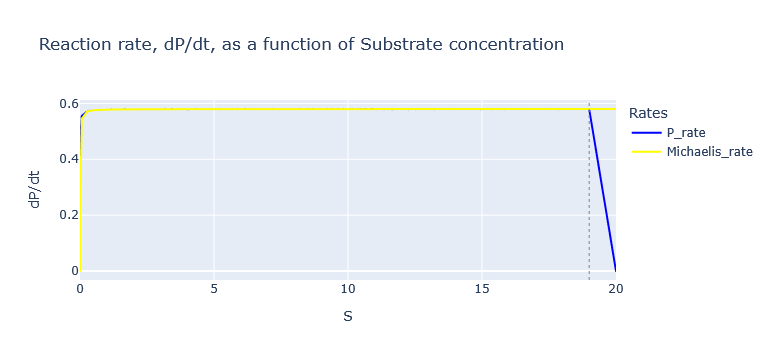

In [29]:
# Let's see how our computed rate compares with the approximations from the Michaelis-Menten model
PlotlyHelper.plot_pandas(df=df, x_var="S", fields=["P_rate", "Michaelis_rate"],
                         title="Reaction rate, dP/dt, as a function of Substrate concentration",
                         y_label="dP/dt", legend_header="Rates",
                         vertical_lines_to_add=19, colors=["blue", "yellow"])

Let's recall that our reactions started with [S]=20  
Virtually overlapped plots, except at the very right! (very early times, when [S] is greater than about 19)

The overlap at the very left (small [S], late in the reaction) has a few issues, but not too bad; let's magnify the previous plot:

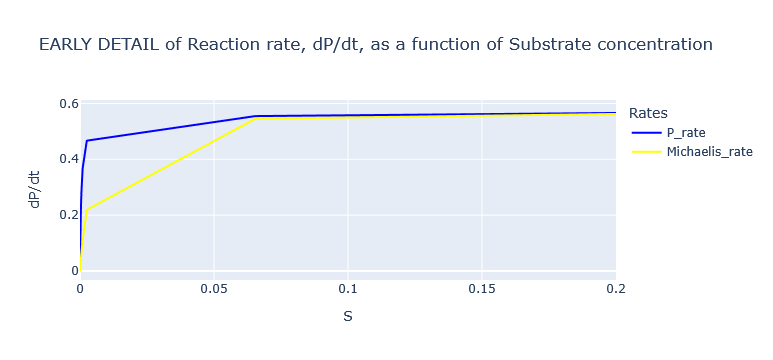

In [30]:
PlotlyHelper.plot_pandas(df=df, x_var="S", fields=["P_rate", "Michaelis_rate"],
                         title="EARLY DETAIL of Reaction rate, dP/dt, as a function of Substrate concentration",
                         y_label="dP/dt", legend_header="Rates",
                         vertical_lines_to_add=19, colors=["blue", "yellow"],
                         range_x=[0, .2])

## In this scenario, the Michaelis-Menten model is remarkable accurate EXCEPT at the very early times of the reaction (the large values of `S`), which is the brief initial transient phase when `ES` builds up from zero.  
### Some discrepancy also at the end of the reaction (when `S` drops to zero)

#### This is as expected, because the kinetic parameters of this reaction satisfy the key Michaelis-Menten assumptions that `[E] << [S]` , but NOT the other assumption that the rates satisfy `k1_reverse >> k2_forward`

# PART 3. Comparing the results to the Morrison model

#### Following section 7.1 of _"Analysis of Enzyme Reaction Kinetics, Vol. 1", by F. Xavier Malcata, Wiley, 2023_, we'll test out an the alternative **Morrison** approach, which is expected to perform better than the **Michaelis-Menten** model when the Enzyme concentration isn't so small.  But, in this scenario, we only have small amounts of enzyme - and we'll see below that no significant improvement is gained by switching model.

In [31]:
df["Morrison_rate"] = rxn.compute_rate_morrison(E_tot=E0,
                                                S_tot=df["S"] + df["ES"])
df

SYSTEM TIME             P        ES         E          S   step  \
0        0.000000  0.000000e+00  0.000000  1.000000  20.000000          
1        0.000010  0.000000e+00  0.032000  0.968000  19.968000      1   
2        0.000021  2.041600e-07  0.066019  0.933981  19.933981      2   
3        0.000024  3.305201e-07  0.075849  0.924151  19.924151      3   
4        0.000025  3.740726e-07  0.078766  0.921234  19.921234      4   
...           ...           ...       ...       ...        ...    ...   
2162    39.081690  1.997468e+01  0.025307  0.974693   0.000014  19889   
2163    39.195774  1.997630e+01  0.023682  0.976318   0.000014  19899   
2164    39.491678  1.998007e+01  0.019917  0.980083   0.000011  19909   
2165    39.836446  1.998373e+01  0.016258  0.983742   0.000010  19919   
2166    39.903868  1.998436e+01  0.015634  0.984366   0.000009  19929   

                caption    P_rate  Michaelis_rate  Morrison_rate  
0     Set concentration  0.000000        0.579879       0.579872  
1     1st reaction step  0.018560        0.579879       0.579872  
2                        0.038291        0.579878       0.579872  
3                        0.043992        0.579878       0.579872  
4                        0.045684        0.579878       0.579872  
...                 ...       ...             ...            ...  
2162                     0.014678        0.002004       0.014624  
2163                     0.013736        0.001873       0.013685  
2164                     0.011552        0.001570       0.011510  
2165                     0.009430        0.001317       0.009395  
2166                     0.009068        0.001227       0.009034  

[2167 rows x 10 columns]

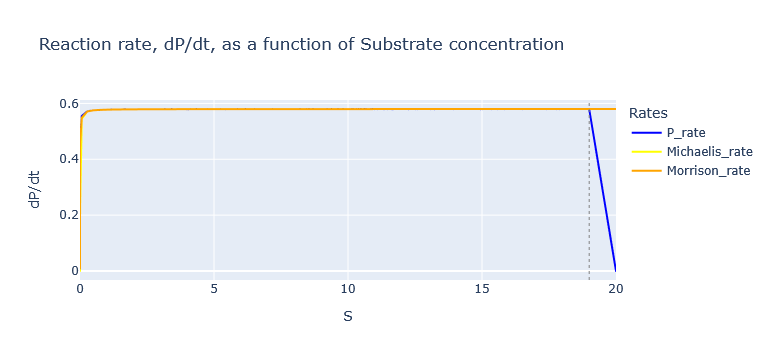

In [32]:
PlotlyHelper.plot_pandas(df=df, x_var="S", fields=["P_rate", "Michaelis_rate", "Morrison_rate"],
                         title="Reaction rate, dP/dt, as a function of Substrate concentration",
                         y_label="dP/dt", legend_header="Rates",
                         vertical_lines_to_add=19,
                         colors=["blue", "yellow", "orange"])

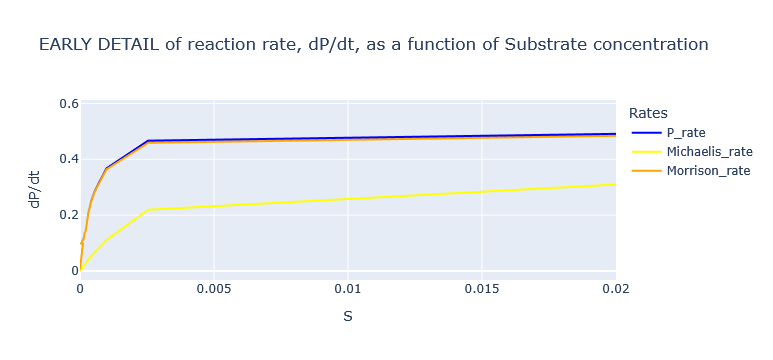

In [33]:
# Detail at the very left
PlotlyHelper.plot_pandas(df=df, x_var="S", fields=["P_rate", "Michaelis_rate", "Morrison_rate"],
                         title="EARLY DETAIL of reaction rate, dP/dt, as a function of Substrate concentration",
                         y_label="dP/dt", legend_header="Rates",
                         vertical_lines_to_add=19,
                         colors=["blue", "yellow", "orange"],
                         range_x=[0, 0.02])

# In this scenario, the Morrison model appears better than the Michaelis-Menten one at late reaction times (small `S`, close to zero) - and virtually identical elsewhere 